# Image Processing <a class="tocSkip">
    
There are many, many more topics to pursue.  Good places to continue learning:
* The SciPy Lecture Notes: https://scipy-lectures.org/
* Read the book "Numerical Python" by Robert Johansson and explore the Jupyter notebooks that are available for that on GitHub.
* There are more workshops this quarter!  Including analyzing and mapping Census Data with Python and exploring scikit-learn.
    
The following is a brief teaser for Image Processing

## Feature Extraction (edge detection)

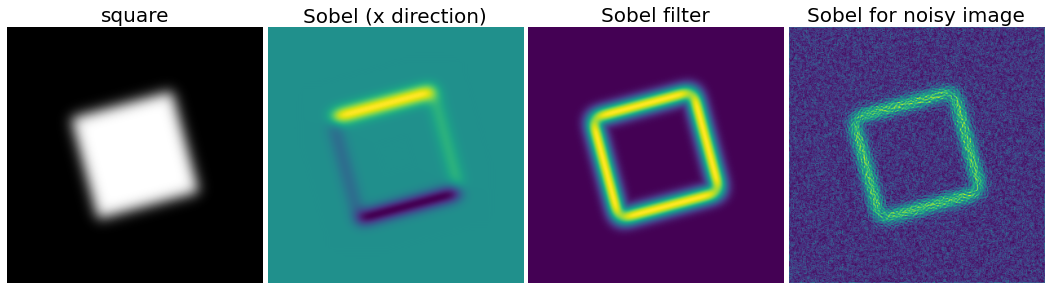

In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im += 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

## Segmentation

/var/folders/qk/hv87dc8s27d5rgnhn23fklgh0000gn/T/ipykernel_27742/2974393435.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
/var/folders/qk/hv87dc8s27d5rgnhn23fklgh0000gn/T/ipykernel_27742/2974393435.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20;

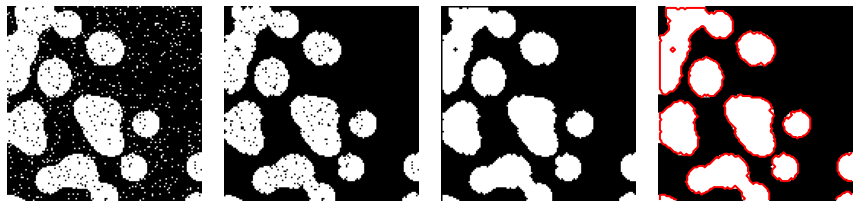

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

binary_img = img > 0.5

## Remove small white regions
open_img = ndimage.binary_opening(binary_img)
## Remove small black hole
close_img = ndimage.binary_closing(open_img)

plt.figure(figsize=(12, 3))

l = 128

plt.subplot(141)
plt.imshow(binary_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(open_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)
plt.imshow(close_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)
plt.imshow(mask[:l, :l], cmap=plt.cm.gray)
plt.contour(close_img[:l, :l], [0.5], linewidths=2, colors='r')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

plt.show()

## Spectral Clustering (using advanced libraries such as scikit-learn)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [4]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

In [5]:
circle1.shape

(100, 100)

In [6]:
circle2.shape

(100, 100)

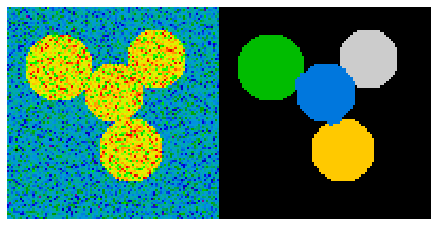

In [7]:
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2*np.random.randn(*img.shape)

## Convert the image into a graph with the value of the gradient on the
## edges.
graph = image.img_to_graph(img, mask=mask)

## Take a decreasing function of the gradient: we take it weakly
## dependant from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

## Force the solver to be arpack, since amg is numerically
## unstable on this example
labels = spectral_clustering(graph, n_clusters=4)
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.nipy_spectral, interpolation='nearest')
plt.axis('off')
plt.subplot(122)
plt.imshow(label_im, cmap=plt.cm.nipy_spectral, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()